In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from decode_fish.imports import *
from decode_fish.funcs.file_io import *
from decode_fish.funcs.emitter_io import *
from decode_fish.funcs.utils import *
from decode_fish.funcs.evaluation import *
from decode_fish.funcs.plotting import *
from torch.utils.data import DataLoader

import ipyvolume as ipv

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

Recall: 0.904
Precision: 0.956
Jaccard: 86.783
RMSE_vol: 70.303
Eff_3d: 62.446
FN: 37.0 FP: 16.0
Shift: 4.05,4.18,5.53


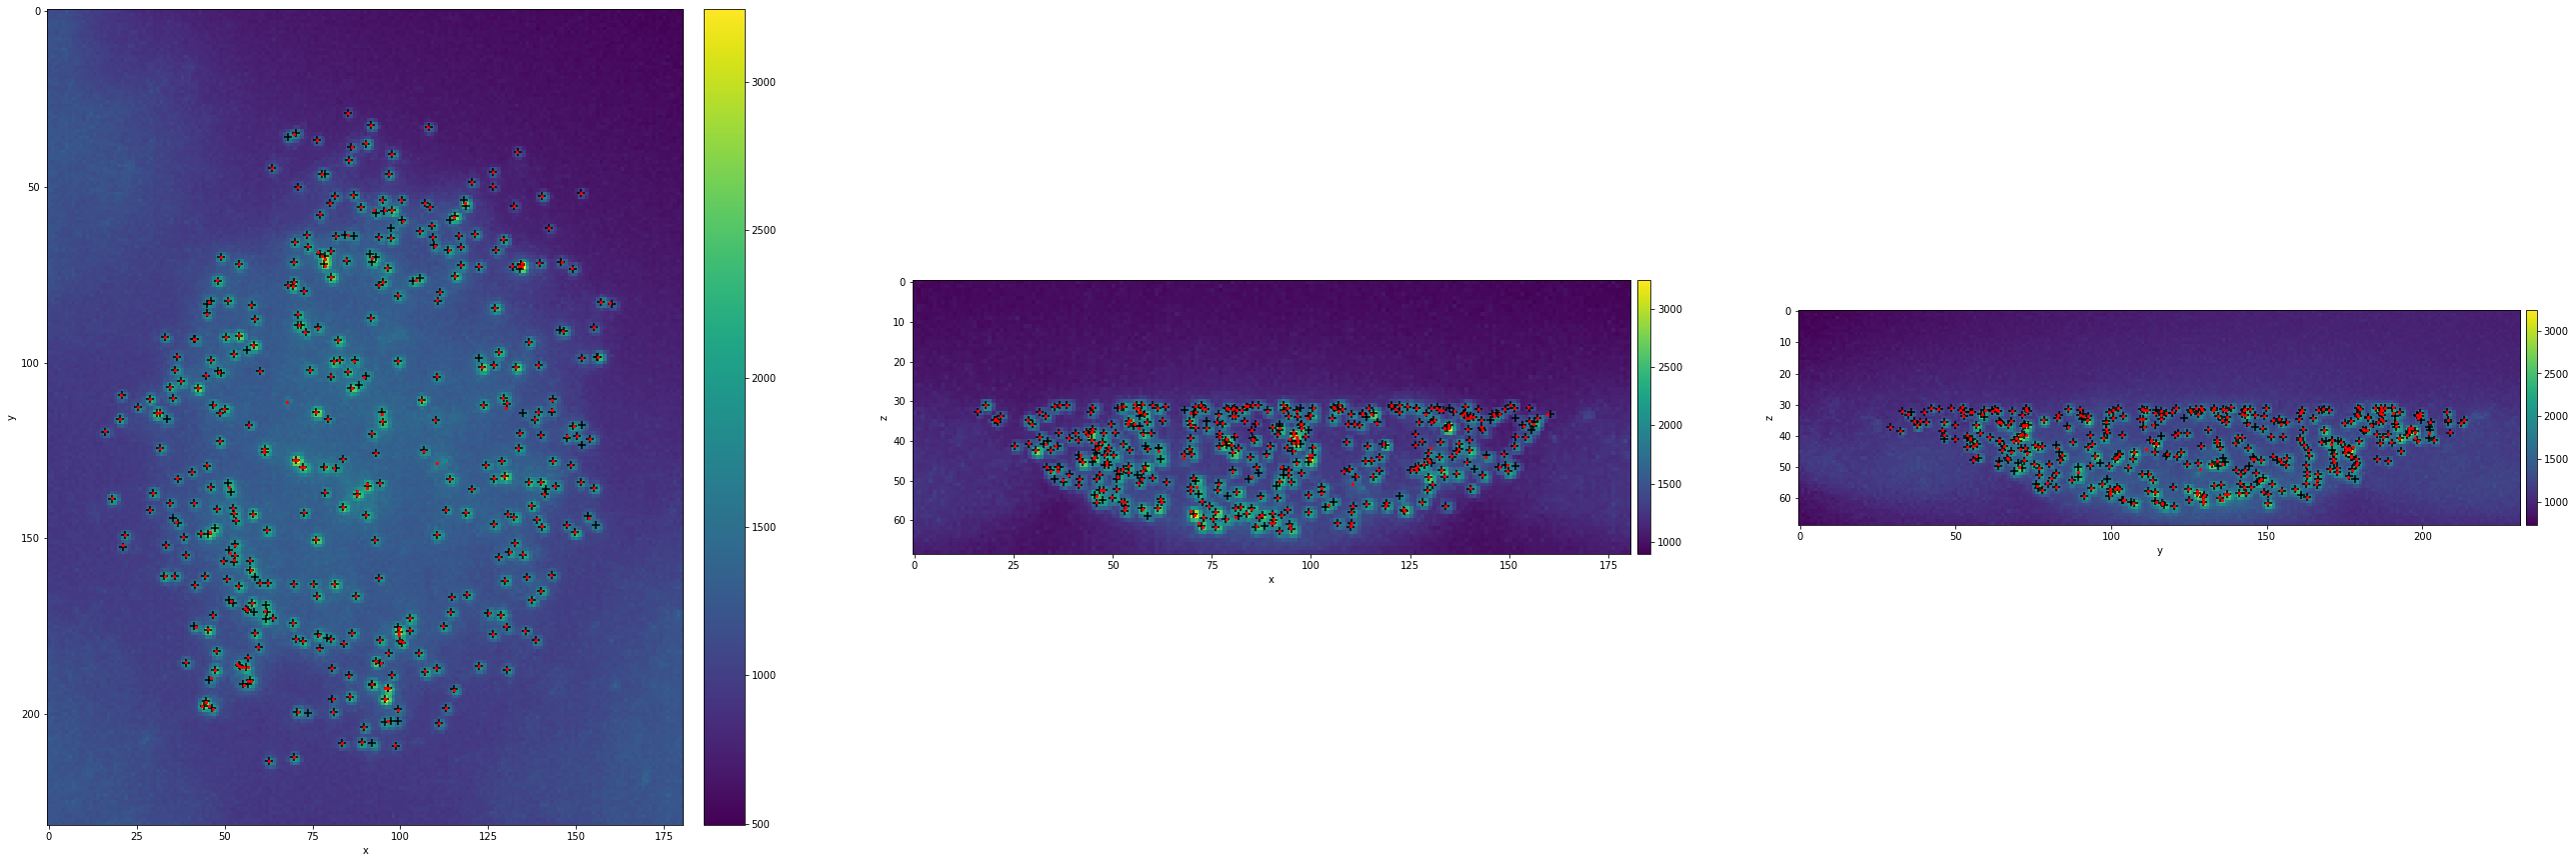

In [91]:
basedir = '/groups/turaga/home/speisera/share_TUM/FishSIM/sim_density_fac05_1/'
img, gt_df, fq_nog_df, fq_gmm_df = load_sim_fish(basedir, 500, 'random', 'NR', 0)
axes = plot_3d_projections(img[0], 'max', size=15)
gt_px = nm_to_px(gt_df, px_size=[100,100,300])
gt_px = nm_to_px(gt_df, px_size=[100,100,300])
fq_px = nm_to_px(fq_gmm_df, px_size=[100,100,300])
axes[0].scatter(gt_px['x'],gt_px['y'], color='black', marker='+', s=50.)
axes[1].scatter(gt_px['x'],gt_px['z'], color='black', marker='+', s=50.)
axes[2].scatter(gt_px['y'],gt_px['z'], color='black', marker='+', s=50.)
axes[0].scatter(fq_px['x'],fq_px['y'], color='red', s=5.)
axes[1].scatter(fq_px['x'],fq_px['z'], color='red', s=5.)
axes[2].scatter(fq_px['y'],fq_px['z'], color='red', s=5.)
perf_df, matches, shift = matching(gt_df, fq_gmm_df, print_res=True)

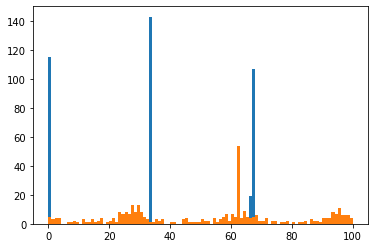

In [94]:
_ = plt.hist(gt_df['x']%100,bins=np.linspace(0,100,101))
_ = plt.hist(fq_gmm_df['x']%100,bins=np.linspace(0,100,101))

In [103]:
basedir = '/groups/turaga/home/speisera/share_TUM/FishSIM/sim_density_fac1_1//'
densities = [250,500,1000,2000,4000]
n_cells = 5

nog_col = []
gmm_col = []

for d in densities:
    print(d)
    gmm_df = []
    nog_df = []
    gtc_df = []
    for i in range(n_cells):
        img, gt_df, fq_nog_df, fq_gmm_df = load_sim_fish(basedir, d, 'random', 'NR', i, shift=[-33, -33, -100])
        nog_df.append(fq_nog_df)
        gmm_df.append(fq_gmm_df)
        gtc_df.append(gt_df)
        
    nog_df = cat_emitter_dfs(nog_df)
    gmm_df = cat_emitter_dfs(gmm_df)
    gtc_df = cat_emitter_dfs(gtc_df)
    print(len(gtc_df))
        
    perf_df, matches, shift = matching(gtc_df, nog_df, print_res=True)
    nog_col.append(perf_df)
    perf_df, matches, shift = matching(gtc_df, gmm_df, print_res=True)
    gmm_col.append(perf_df)

250
1357
Recall: 0.497
Precision: 0.968
Jaccard: 48.949
RMSE_vol: 76.742
Eff_3d: 36.136
FN: 682.0 FP: 22.0
Shift: -2.49,0.25,-3.59
Recall: 0.499
Precision: 0.956
Jaccard: 48.775
RMSE_vol: 77.061
Eff_3d: 35.902
FN: 680.0 FP: 31.0
Shift: -2.46,0.30,-4.05
500
2763


KeyboardInterrupt: 

In [100]:
# with open(basedir + 'fq_perf_dfs.pkl', 'wb') as f:
#     pickle.dump({'gmm':gmm_col, 'nog':nog_col, 'densities':[250,500,1000,2000,4000]}, f)

Recall: 0.978
Precision: 0.838
Jaccard: 82.243
RMSE_vol: 114.425
Eff_3d: 40.095
FN: 4.0 FP: 34.0
Shift: 5.23,-1.13,9.32


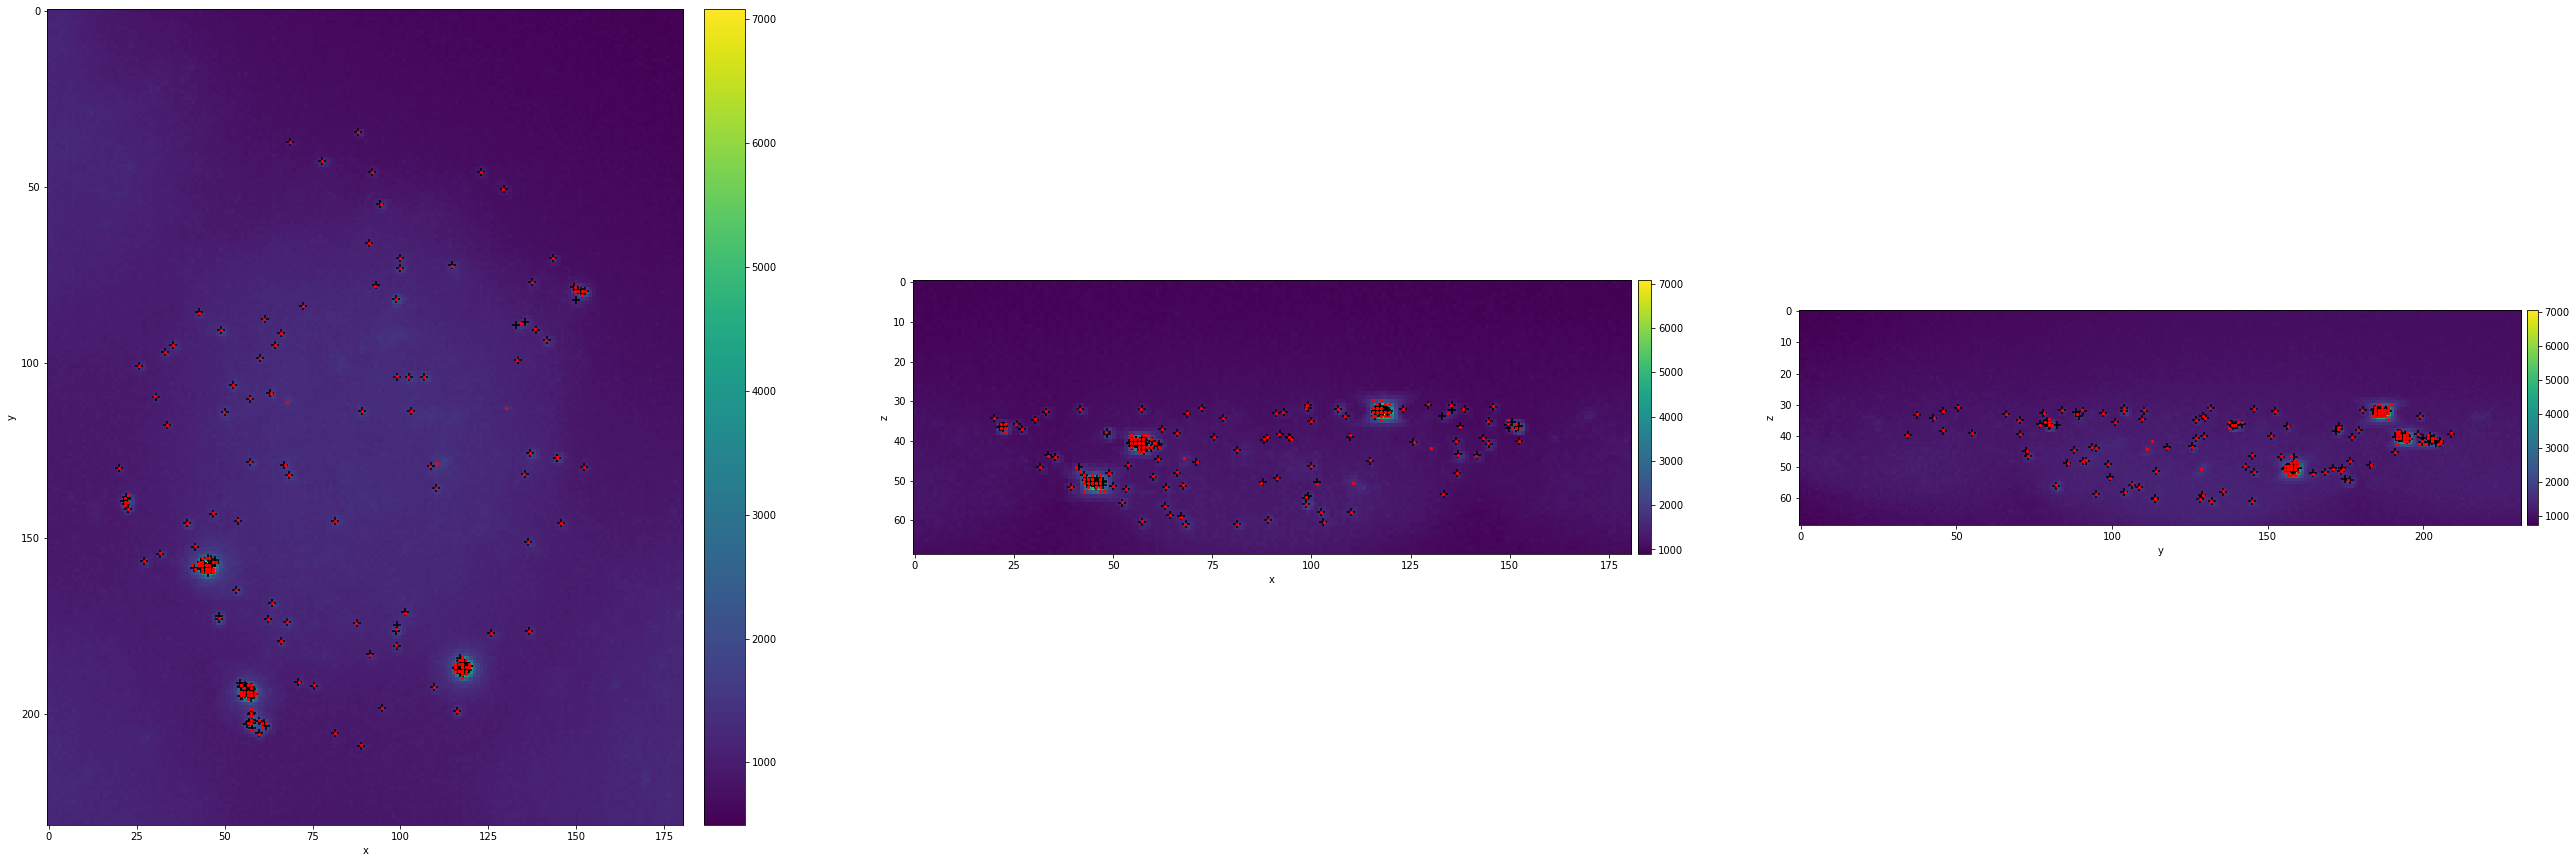

In [114]:
basedir = '/groups/turaga/home/speisera/share_TUM/FishSIM/sim_foci_fac1_1//'
img, gt_df, fq_nog_df, fq_gmm_df = load_sim_fish(basedir, 100, 'foci', 'strong', 2)
axes = plot_3d_projections(img[0], 'max', size=15)
gt_px = nm_to_px(gt_df, px_size=[100,100,300])
fq_px = nm_to_px(fq_gmm_df, px_size=[100,100,300])
axes[0].scatter(gt_px['x'],gt_px['y'], color='black', marker='+', s=50.)
axes[1].scatter(gt_px['x'],gt_px['z'], color='black', marker='+', s=50.)
axes[2].scatter(gt_px['y'],gt_px['z'], color='black', marker='+', s=50.)
axes[0].scatter(fq_px['x'],fq_px['y'], color='red', s=5.)
axes[1].scatter(fq_px['x'],fq_px['z'], color='red', s=5.)
axes[2].scatter(fq_px['y'],fq_px['z'], color='red', s=5.)

perf_df, matches, shift = matching(gt_df, fq_gmm_df, print_res=True)

In [117]:
from decode_fish.funcs.fit_psf import get_peaks_3d
from decode_fish.funcs.fit_psf import plot_detection

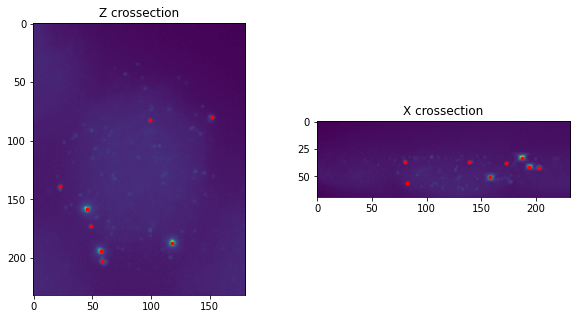

In [125]:
coords_xyz = get_peaks_3d(img[0], threshold=2000, min_distance=5)
plot_detection(img[0], coords_xyz)
coords_zyx = coords_xyz[:,::-1]

In [135]:
basedir = '/groups/turaga/home/speisera/share_TUM/FishSIM/sim_foci_fac1_1//'

box_sz = 10
n_cells = 20
gt_counts = []
fq_counts = []

for i in tqdm(range(n_cells)):

    img, gt_df, fq_nog_df, fq_gmm_df = load_sim_fish(basedir, 100, 'foci', 'strong', i)
    gt_px = nm_to_px(gt_df, px_size=[100,100,300])
    fq_px = nm_to_px(fq_gmm_df, px_size=[100,100,300])
    
    try:
        coords_xyz = get_peaks_3d(img[0], threshold=2000, min_distance=5)
    except AssertionError:
        continue
#     plot_detection(img[0], coords_xyz)
    coords_zyx = coords_xyz[:,::-1]

    for c in coords_zyx:
        sl = np.s_[:,c[0]-box_sz:c[0]+box_sz+1, c[1]-box_sz:c[1]+box_sz+1, c[2]-box_sz:c[2]+box_sz+1]
        gt_crop = crop_df(gt_px, sl)
        fq_crop = crop_df(fq_px, sl)

        gt_counts.append(len(gt_crop))
        fq_counts.append(len(fq_crop))

100%|██████████| 20/20 [00:04<00:00,  4.73it/s]


Text(0, 0.5, 'Predicted truth N mRNA')

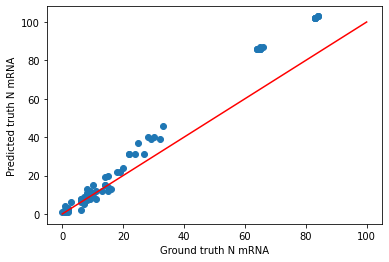

In [138]:
plt.scatter(gt_counts, fq_counts)
plt.plot([0,100],[0,100], 'red')
plt.xlabel('Ground truth N mRNA')
plt.ylabel('Predicted truth N mRNA')